<a href="https://colab.research.google.com/github/Abdur097/PCVK_Genap_2022/blob/main/Pertemuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mengakses drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


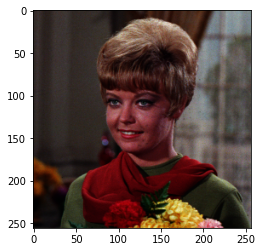

In [2]:
# Melakukan import library
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

# Import foto dari drive
img_f = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

Gamma Correction pada citra
-----------------------------------
Masukkan nilai Gamma: 3


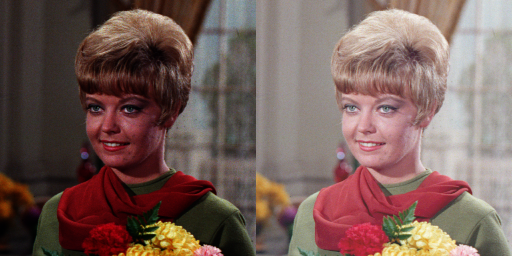

In [3]:
# Tugas 1
# Buat Gamma Correction

print('Gamma Correction pada citra')
print('-----------------------------------')
try:
  gamma = int (input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
img_gama = np.zeros(original.shape, original.dtype)

# Akses gambar tiap pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):

     # Rumus Gamma Correction
     img_gama[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, img_gama))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth: 3


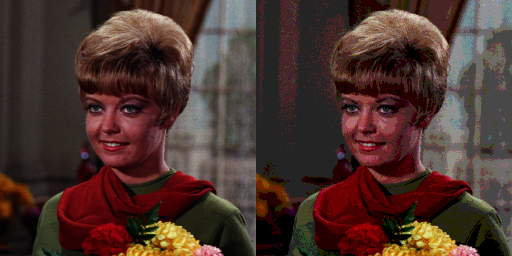

In [6]:
# Tugas 2
# Buat Simulasi Image Depth 

print(' Simulasi Image Depth ')
print('----------------------')
try:
  depth = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
img_depth = np.zeros(original.shape, original.dtype)

# Rumus menentukan level kedalaman
level = 255 / ((2**depth) - 1)

# Akses gambar tiap pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):

      # Rumus Bit Depth
      img_depth[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, img_depth))
cv2_imshow(final_frame)

Jumlah Citra di Average = 5
Nilai PSNR = 27.536073966869555 dB


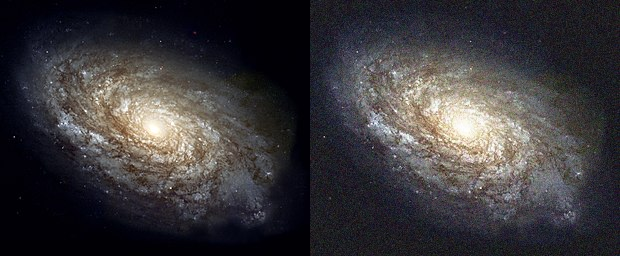

In [7]:
# Tugas 3
# Buat modul Average Denoising
# 3.1 = Jumlah Citra 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Tugas_Kuliah/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

dst = cv_img[0]
# index (array) gambar pada folder noises dimulai dari 0
noise_number = 4 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti

        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 5')
print('Nilai PSNR =',psnr,'dB')

galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average = 30
Nilai PSNR = 27.524562543017744 dB


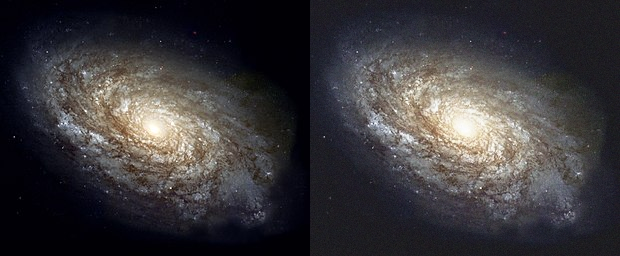

In [8]:
# 3.2 = Jumlah Citra 30

dst = cv_img[0]
# index (array) gambar pada folder noises dimulai dari 0
noise_number = 29 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 30')
print('Nilai PSNR =',psnr,'dB')

galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average = 60
Nilai PSNR = 27.49674877373203 dB


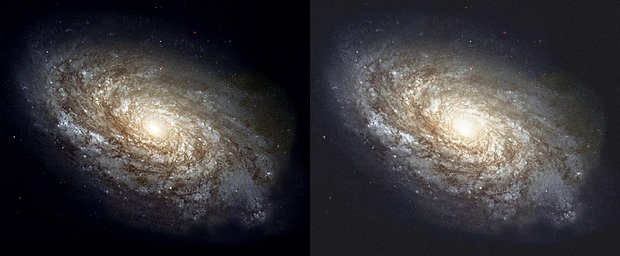

In [9]:
# 3.3 = Jumlah Citra 60

dst = cv_img[0]
# index (array) gambar pada folder noises dimulai dari 0
noise_number = 59 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 60')
print('Nilai PSNR =',psnr,'dB')

galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average = 80
Nilai PSNR = 27.50847838662391 dB


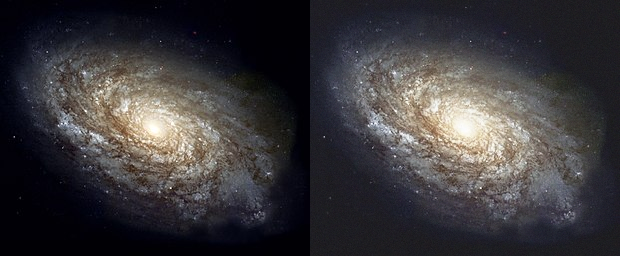

In [10]:
# 3.4 = Jumlah Citra 80

dst = cv_img[0]
# index (array) gambar pada folder noises dimulai dari 0
noise_number = 79 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 80')
print('Nilai PSNR =',psnr,'dB')

galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average = 100
Nilai PSNR = 27.514741068934295 dB


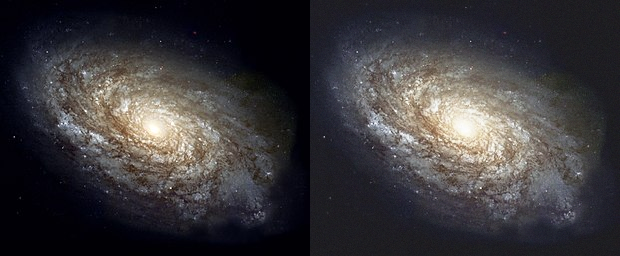

In [11]:
# 3.5 = Jumlah Citra 100

dst = cv_img[0]
# index (array) gambar pada folder noises dimulai dari 0
noise_number = 99 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 100')
print('Nilai PSNR =',psnr,'dB')

galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

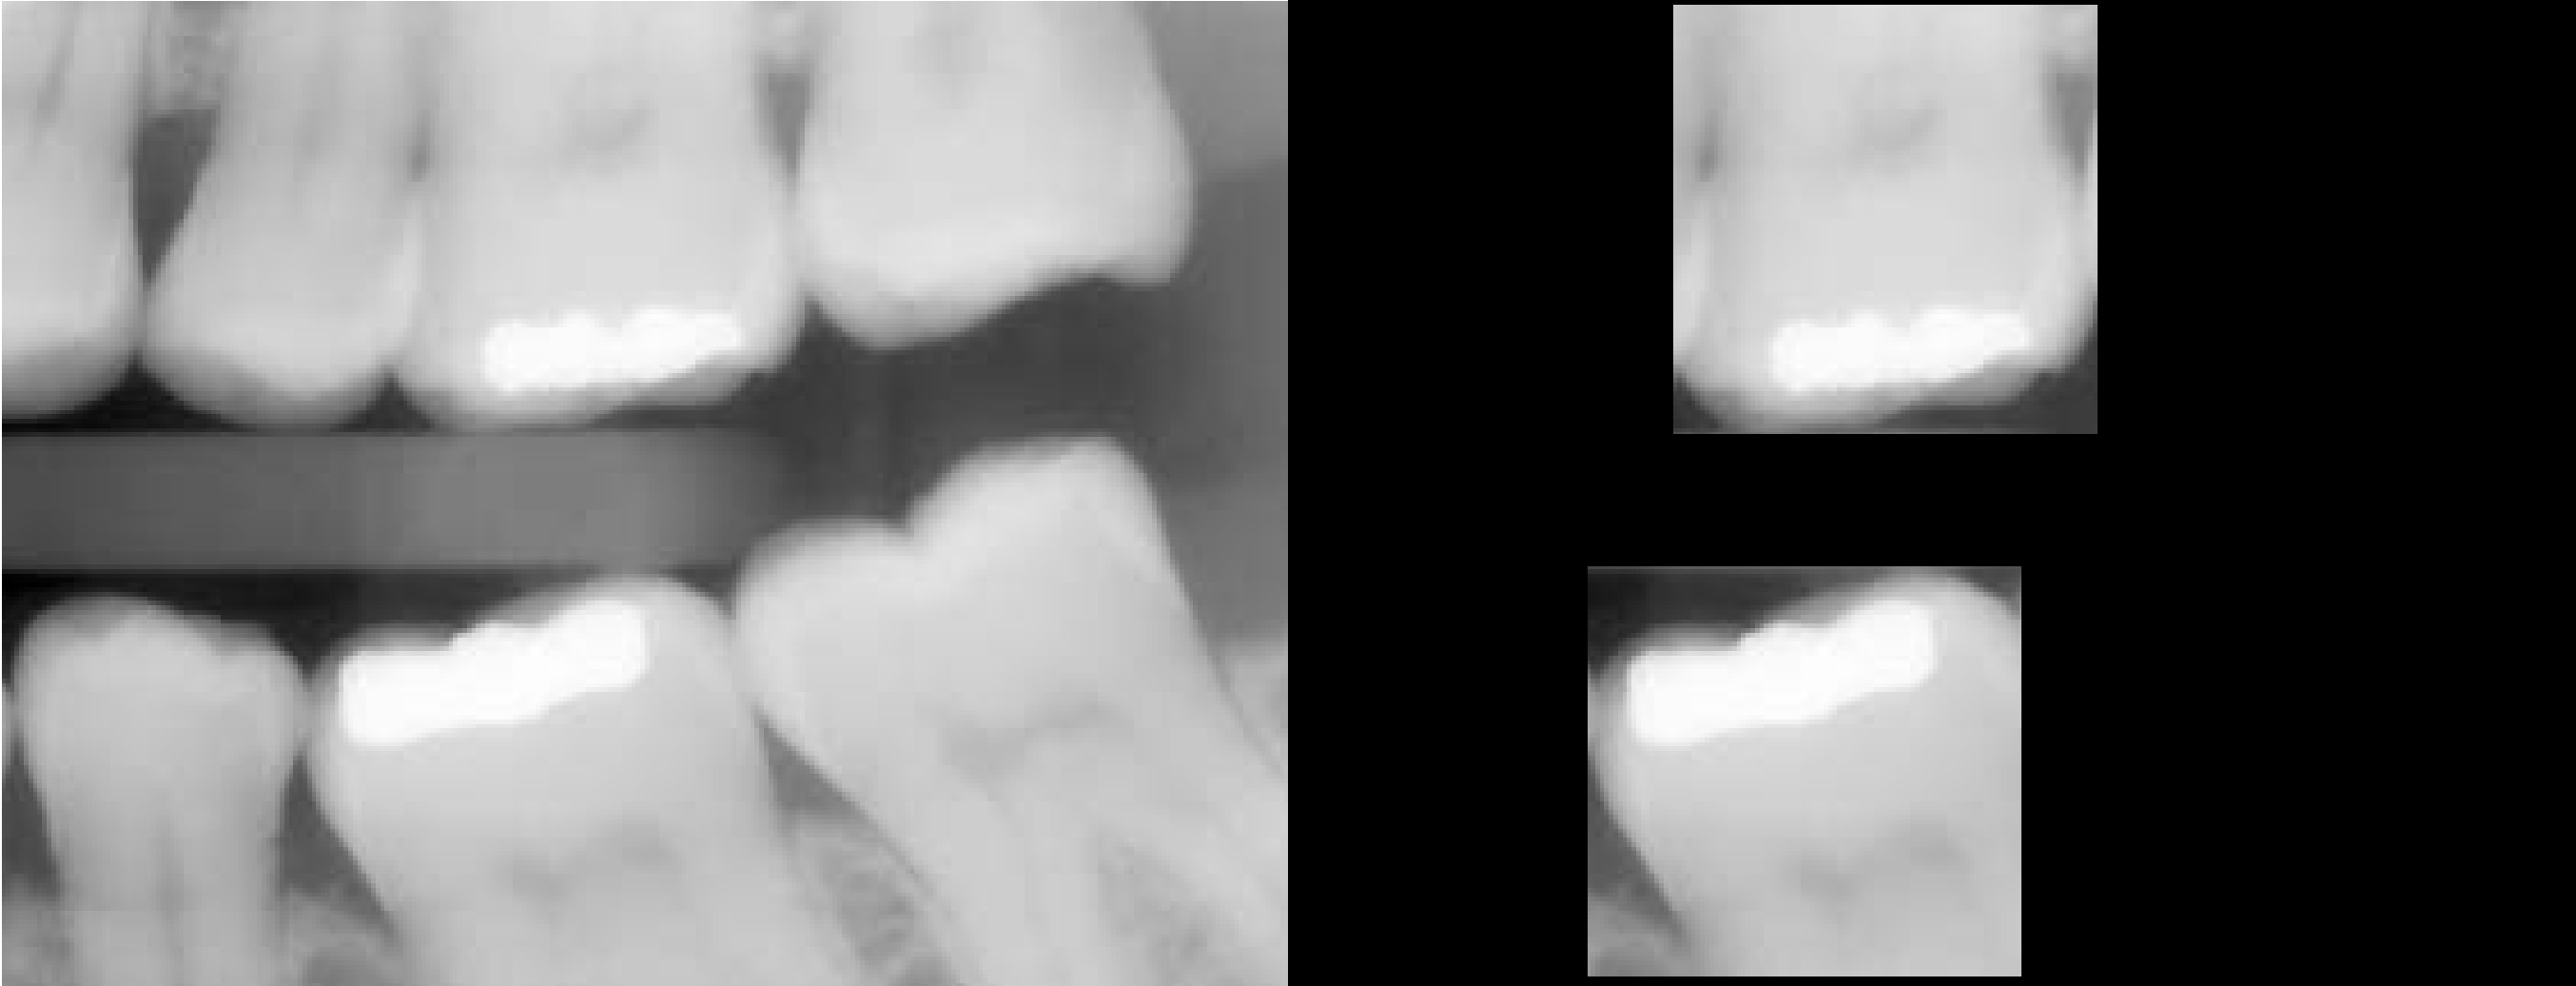

In [14]:
# Tugas 4
# Buat image masking 

original = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK/teeth.jpg')
mask = np.zeros(original.shape, dtype = np.uint8)

mask = cv.rectangle(mask, pt1 = (315, 595), pt2 = (770, 1025), color=(255,255,255), thickness =-1)
result = original & mask

mask1 = cv.rectangle(mask, pt1 = (405, 5), pt2 = (850, 455), color=(255,255,255), thickness =-1)
result = original & mask1

teeth_frame  = cv.hconcat((original, result))
cv2_imshow(teeth_frame )

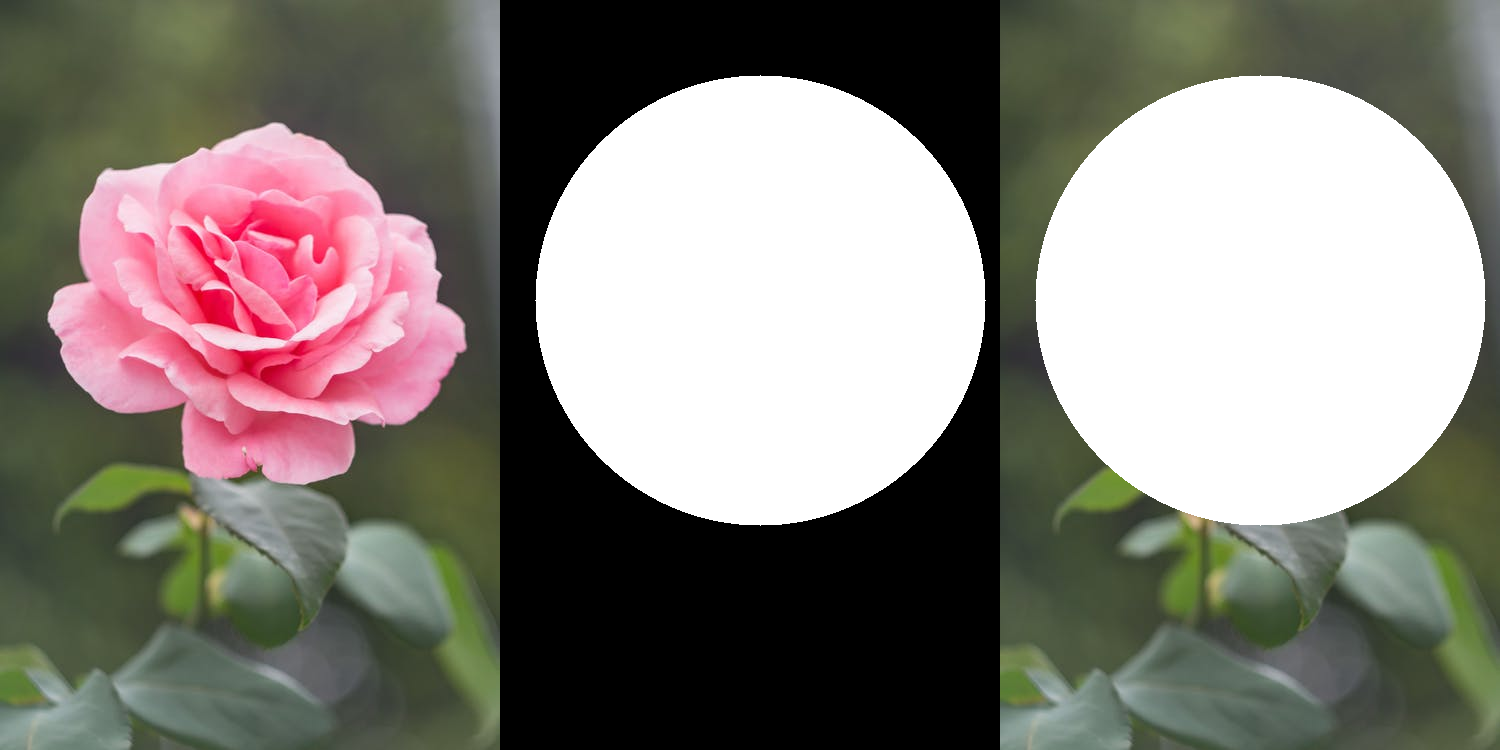

In [18]:
# Tugas 5
# Percobaan menggunakan operator lain (Image Masking)
# 5.1 = OR

img_rose = cv.imread('/content/drive/MyDrive/Tugas_Kuliah/PCVK/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask  = cv.circle(mask , (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

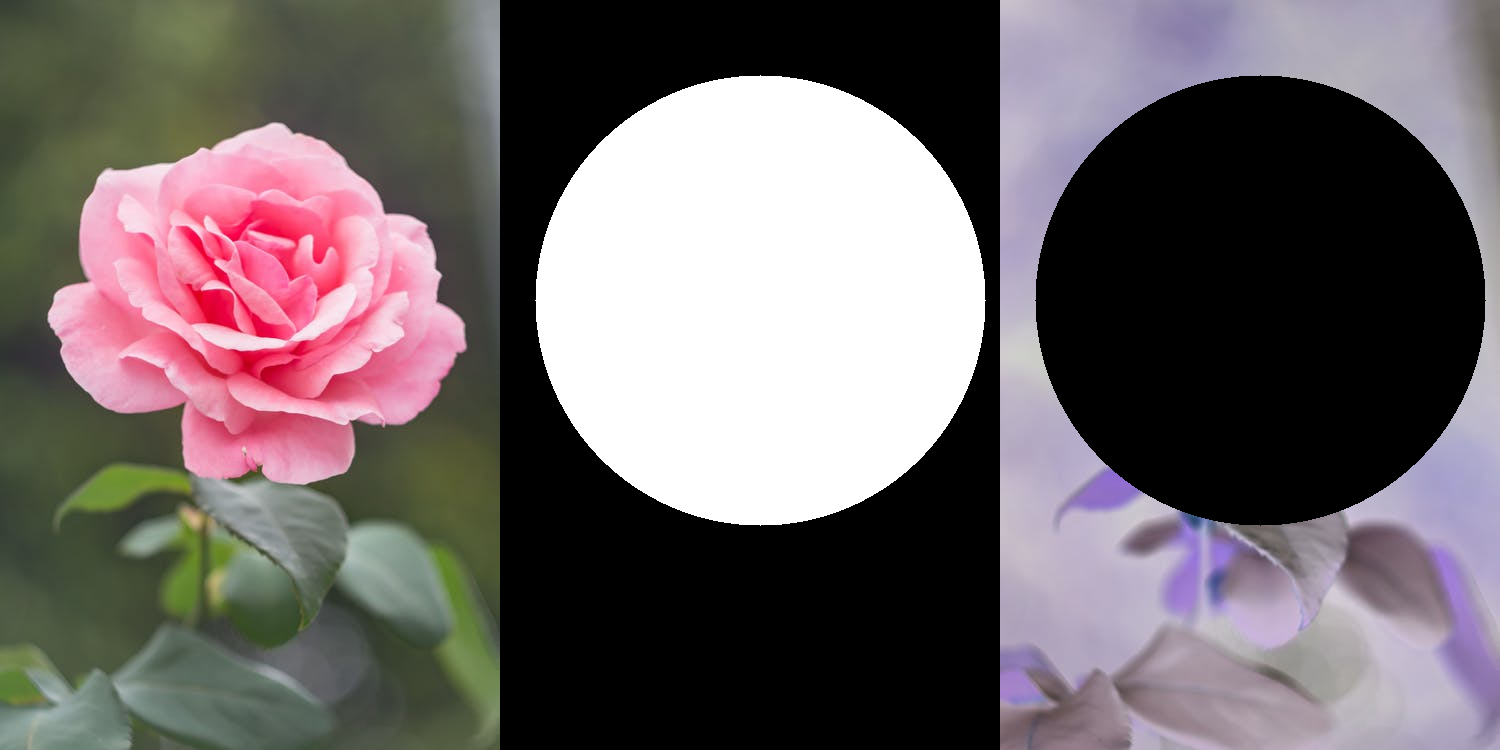

In [19]:
# 5.2 = NOT

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

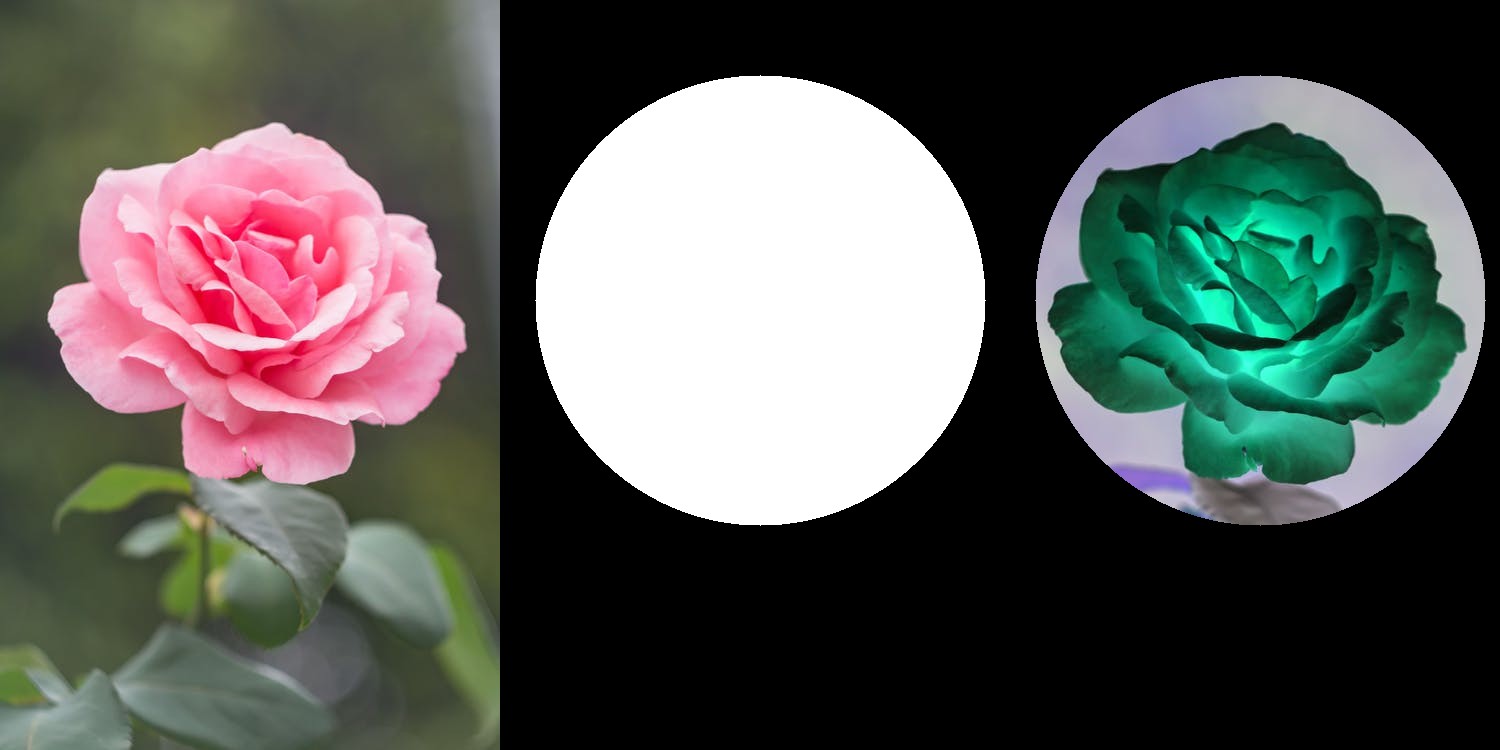

In [20]:
# 5.3 = NAND

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

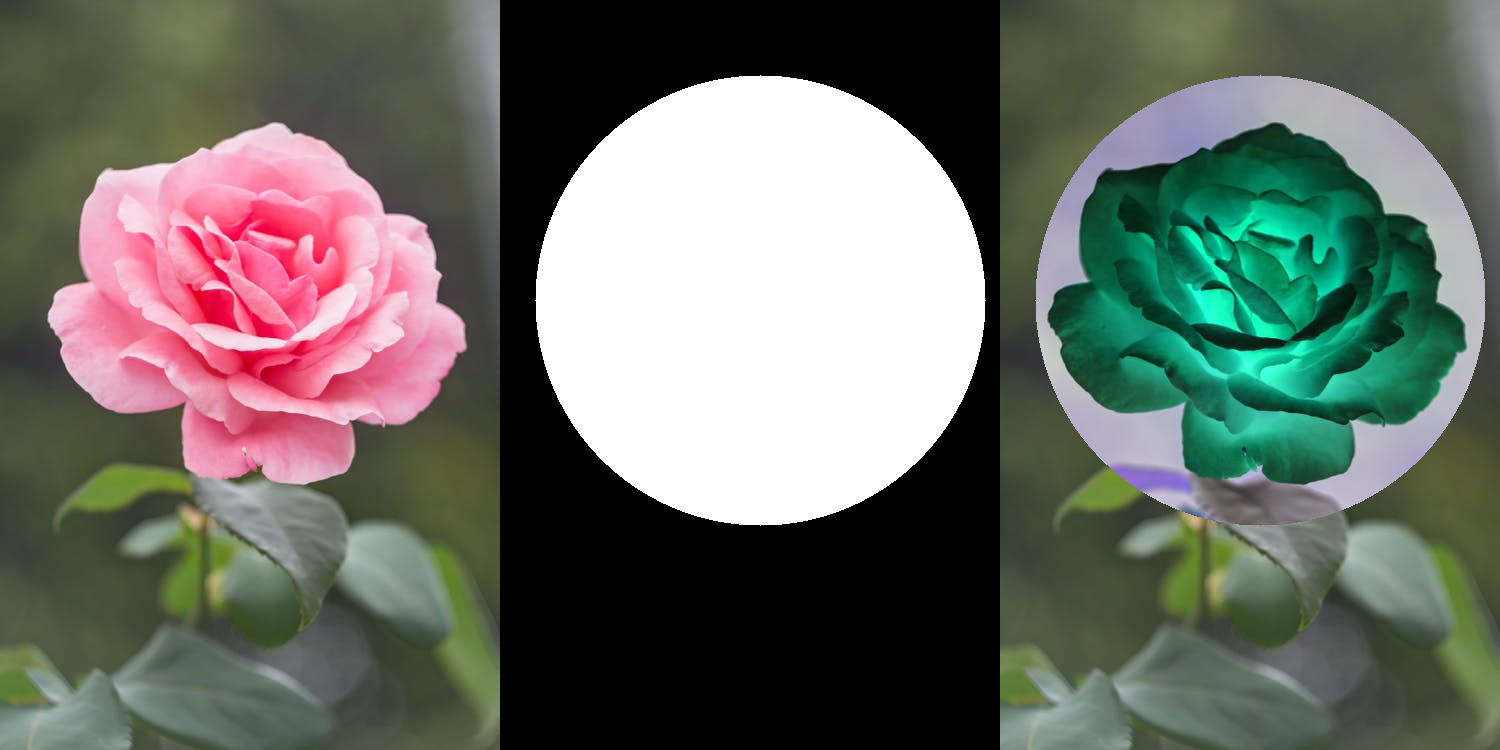

In [21]:
# 5.4 = XOR

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)